In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as pl
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r'adult.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtypes != 'O':
        num.append(i)
    else:
        cat.append(i)
print(cat)
print(num)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [11]:
for i in data.columns:
    print(i,"\n",data[i].value_counts())
    print('='*100)

age 
 36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
workclass 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
fnlwgt 
 20

In [12]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
data.replace("?",np.nan,inplace=True)

In [14]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
for i in data.columns:
    print(i,"\n",data[i].value_counts())
    print('='*100)

age 
 36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
workclass 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
fnlwgt 
 203488    21
190290    19
12

In [16]:
data['workclass'].mode()[0]

'Private'

In [17]:
data['workclass'].mode()

0    Private
dtype: object

In [18]:
data.workclass.isnull().sum()

2799

def fil(a):
    data.a.fillna(list((dict(data.workclass.value_counts()).keys()))[0],inplace=True)

In [156]:
def fil(a):
    return a.fillna(data.a.mode()[0],inplace=True)

In [157]:
for i in range(len(data.workclass)):
    fil(data.workclass[i])

AttributeError: 'str' object has no attribute 'fillna'

In [19]:
data.workclass.fillna(data.workclass.mode()[0],inplace=True)

In [20]:
data.workclass.isnull().sum()

0

In [158]:
fillna(occupation)

NameError: name 'fillna' is not defined

In [21]:
data.workclass.mode()[0]

'Private'

In [160]:
list((dict(data.workclass.value_counts().keys()))[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-160-74b803553b9c>, line 1)

In [22]:
data.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [23]:
data.occupation.fillna(data.occupation.mode()[0],inplace=True)

In [24]:
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)

In [25]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [26]:
num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

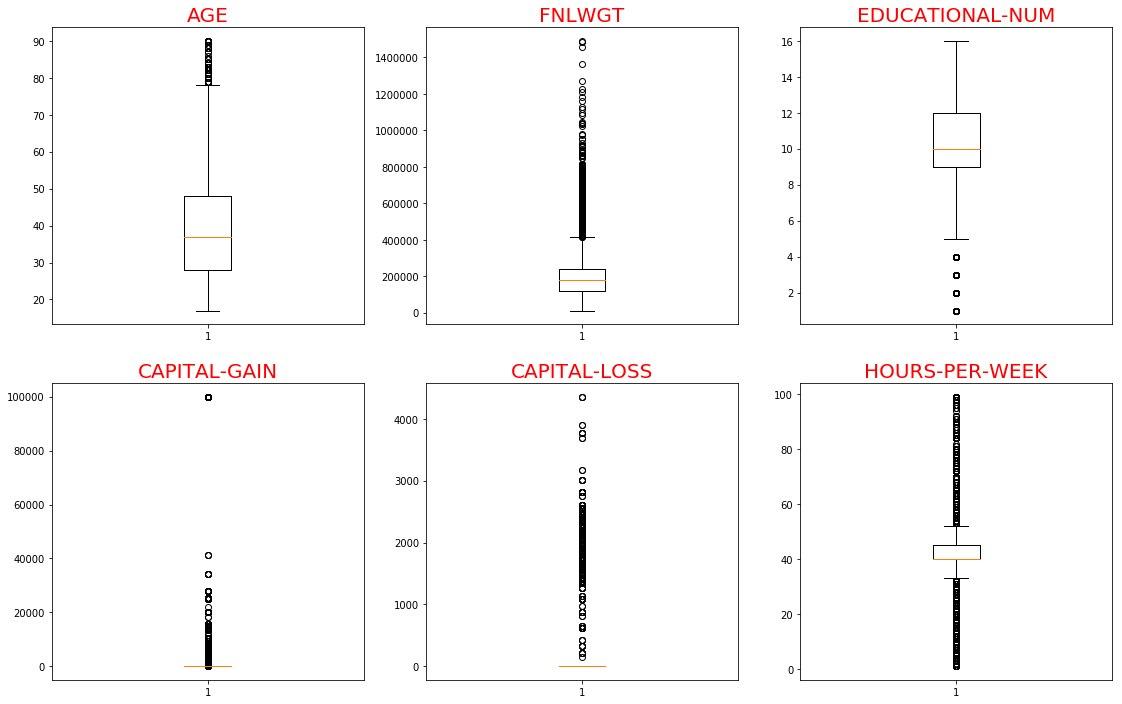

In [27]:
plt.figure(figsize=(19,12))
for i in range(len(num)):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[num[i]])
    plt.title(num[i].upper(),color="r",fontsize=20)

# Univariate Analysis

- Categorical

### Count plot

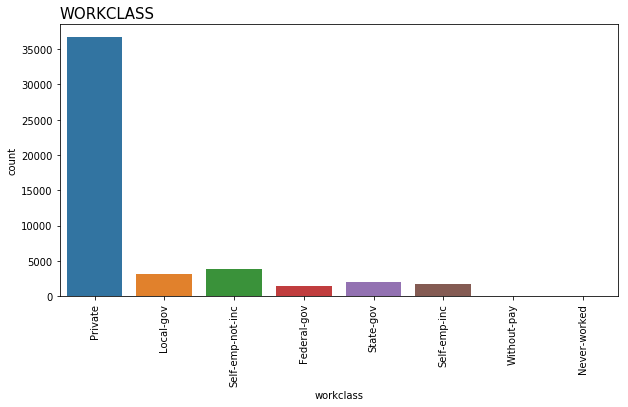

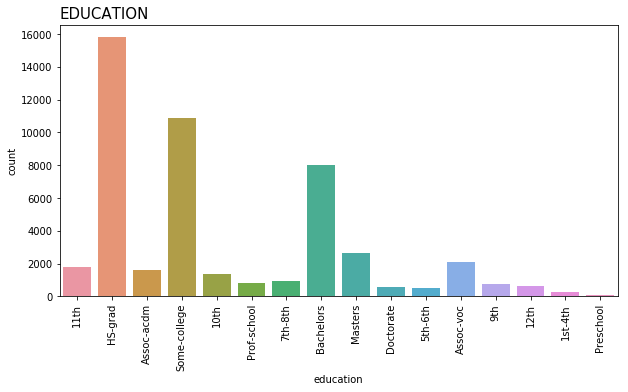

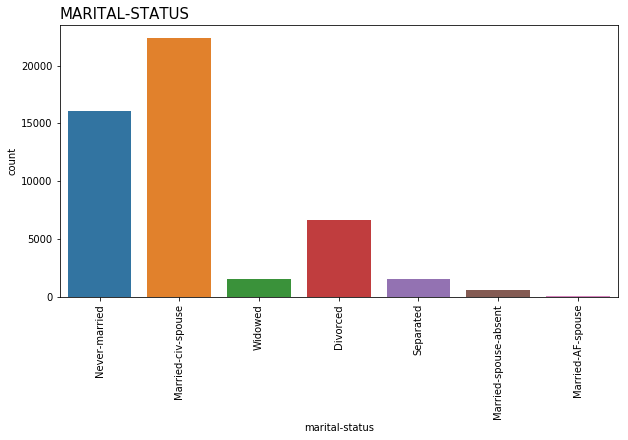

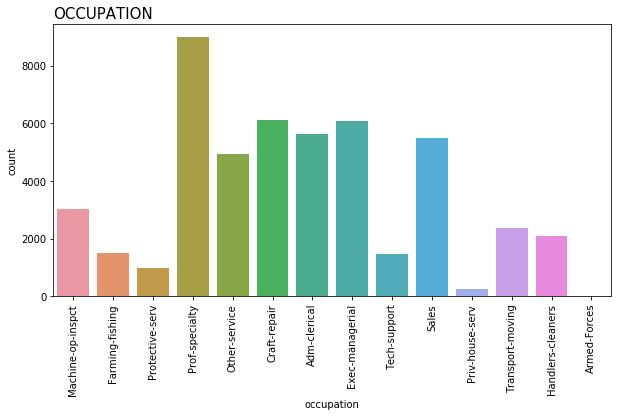

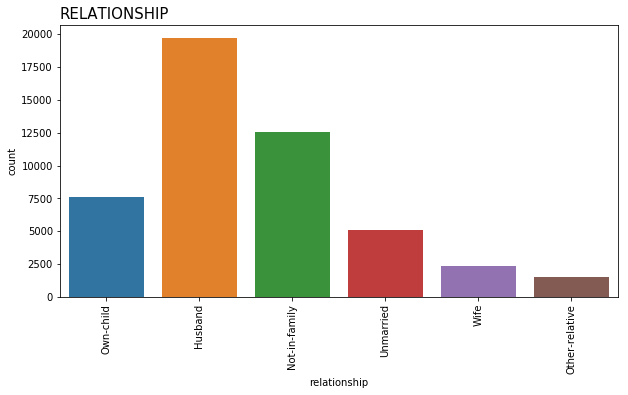

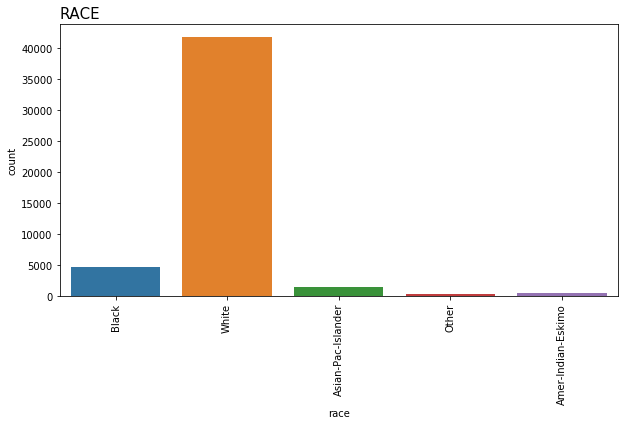

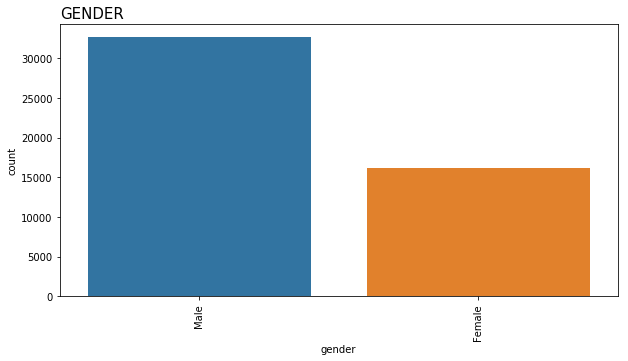

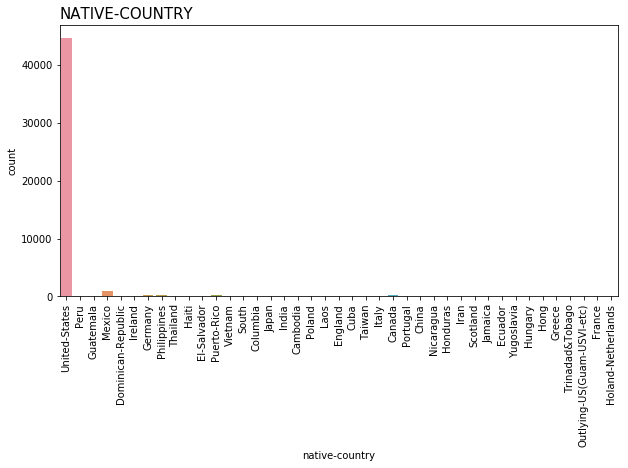

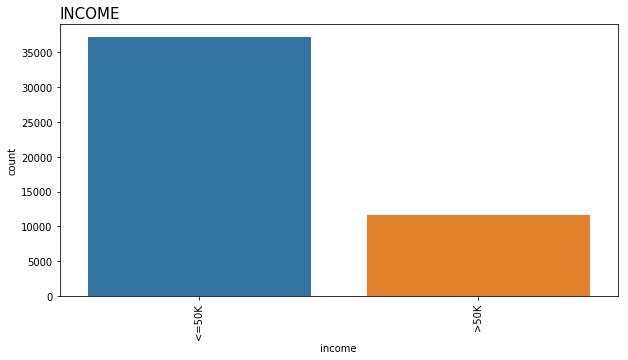

In [29]:
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data[i])
    plt.title(i.upper(),loc='left',fontsize=15)
    plt.xticks(rotation=90)

- Numerical

### Histogram

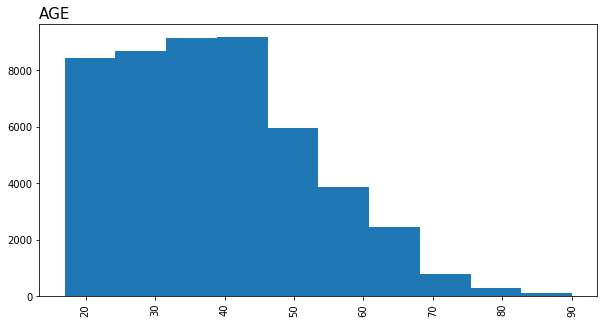

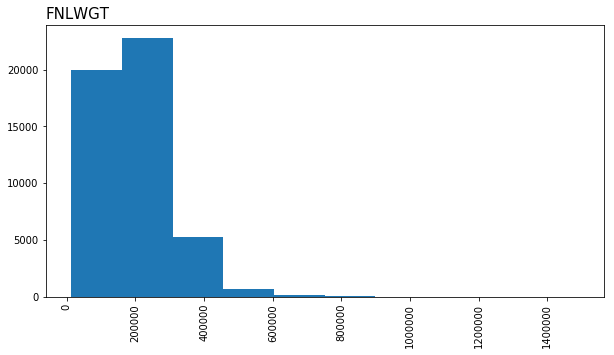

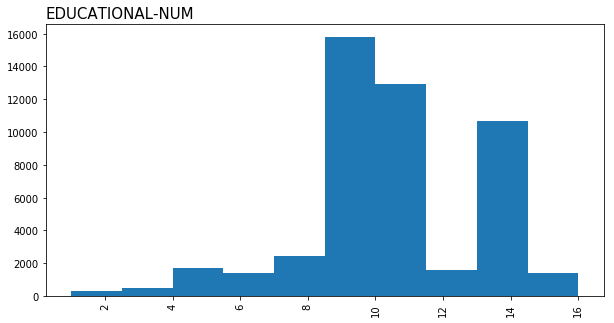

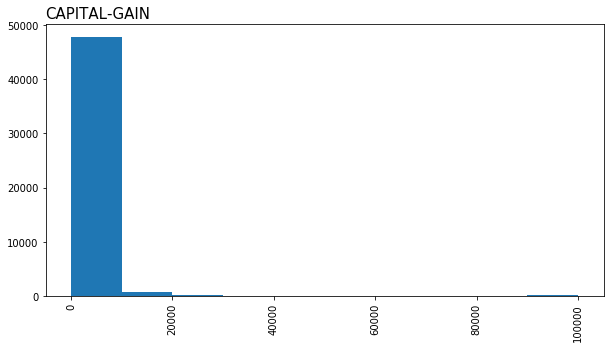

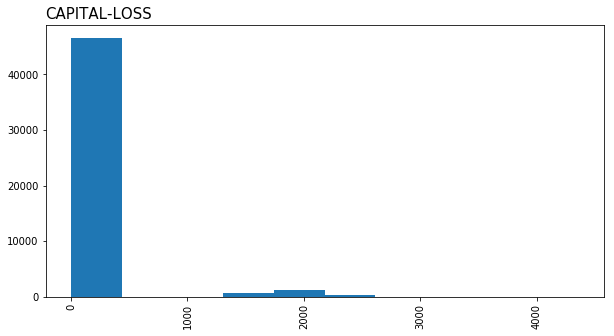

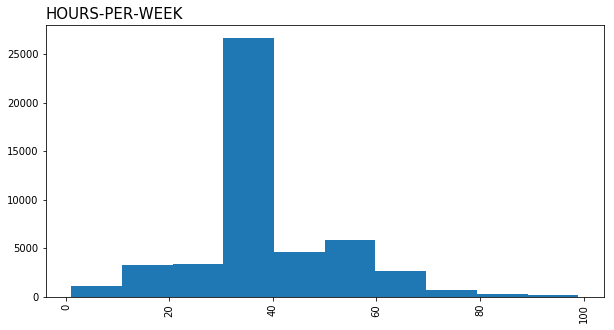

In [31]:
for i in num:
    plt.figure(figsize=(10,5))
    plt.hist(data[i])
    plt.title(i.upper(),loc='left',fontsize=15)
    plt.xticks(rotation=90)

# Bivariate plots
> categorical nv Numerical

### Box Plot

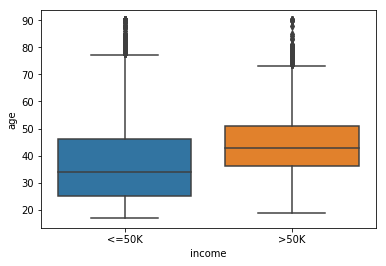

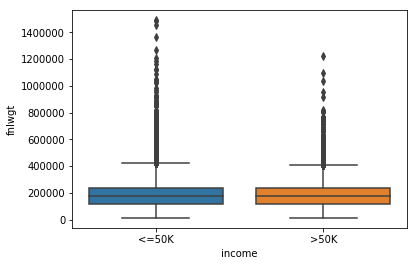

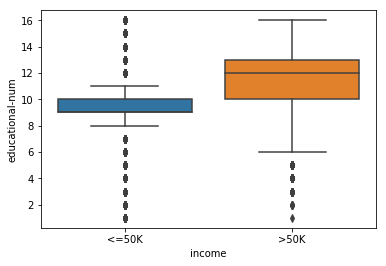

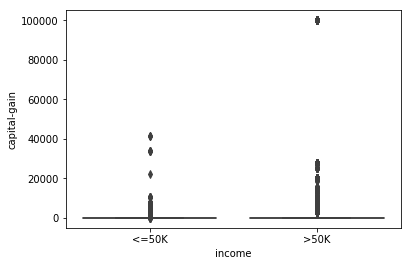

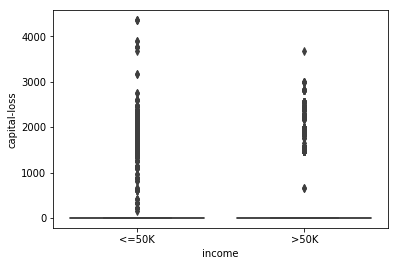

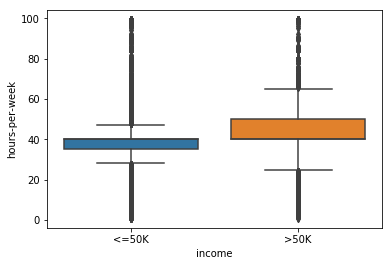

In [39]:
for i in num:
    plt.figure()
    sns.boxplot(data['income'],y=data[i])

### Strip Plot

In [41]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [40]:
num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

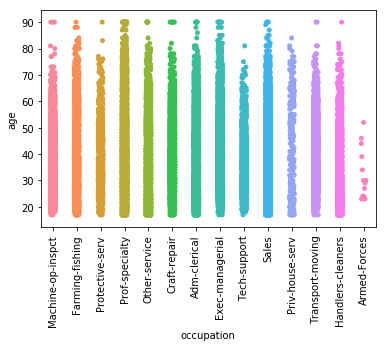

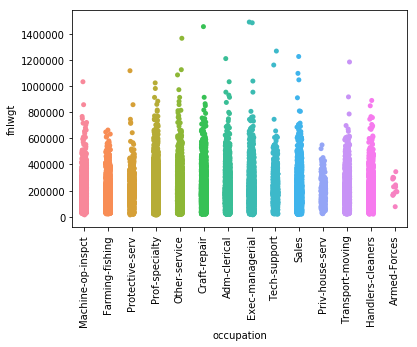

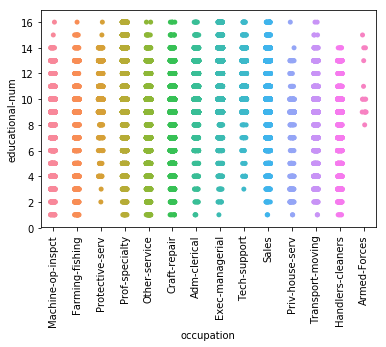

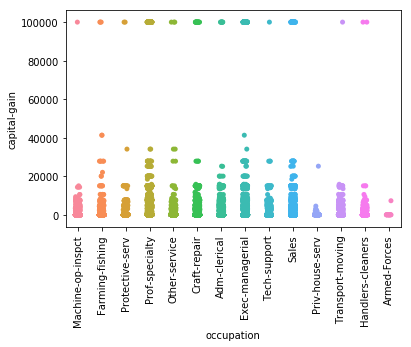

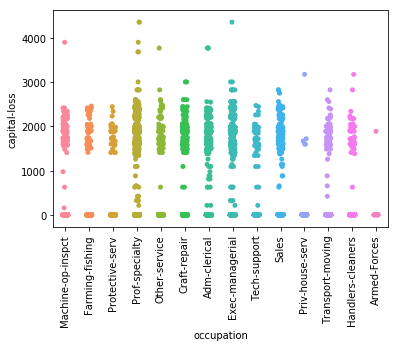

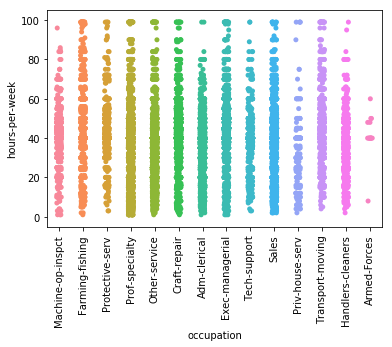

In [47]:
for i in num:
    plt.figure()
    sns.stripplot(data['occupation'],data[i])
    plt.xticks(rotation=90)

- Numerical vs Numerical

In [71]:
num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Scatter Plot

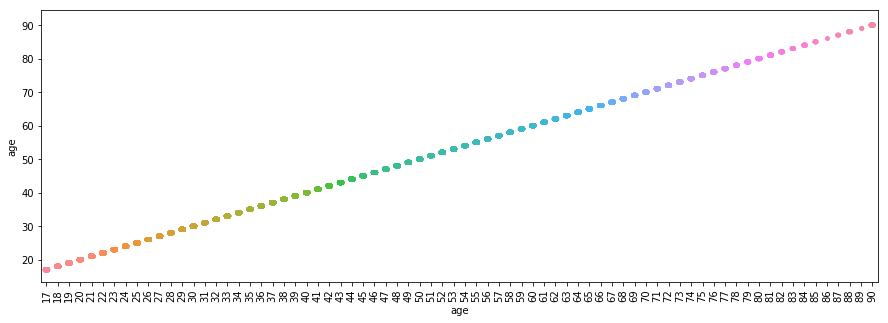

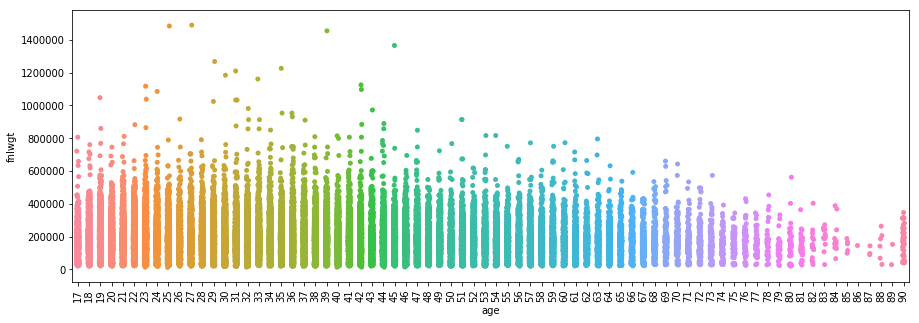

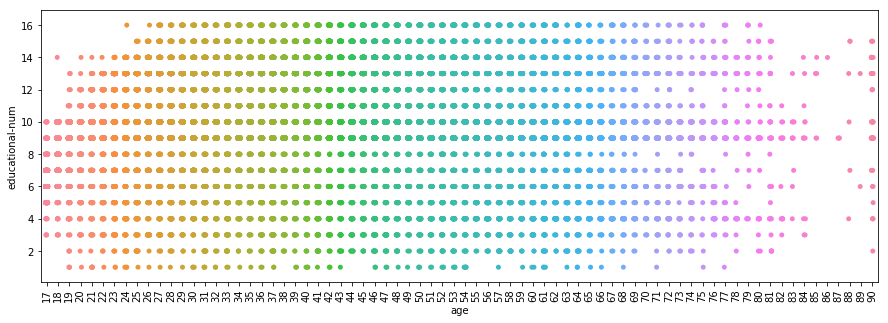

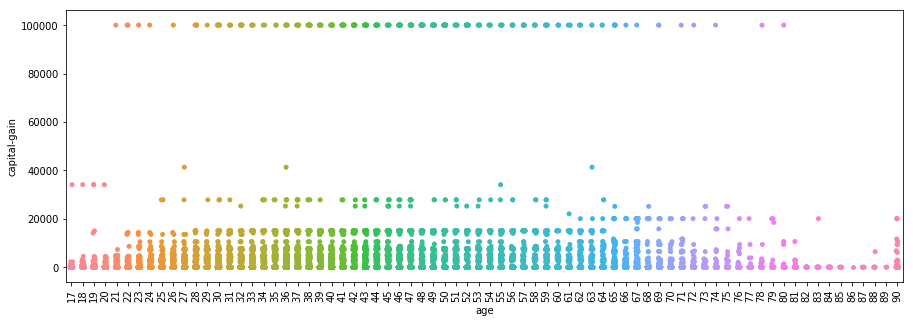

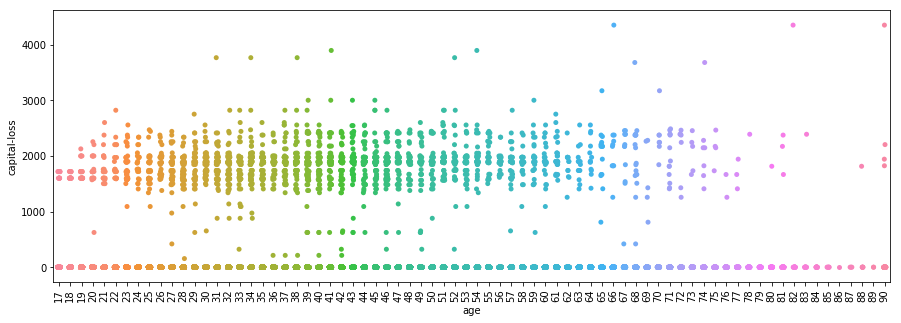

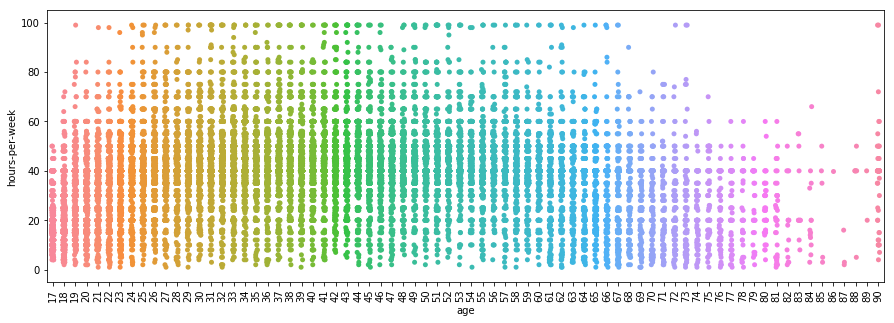

In [52]:
for i in num:
    plt.figure(figsize=(15,5))
    sns.stripplot(data['age'],data[i])
    plt.xticks(rotation=90)

### Reg Plot

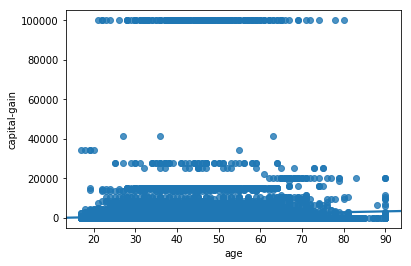

In [72]:
sns.regplot(data['age'],data['capital-gain'])

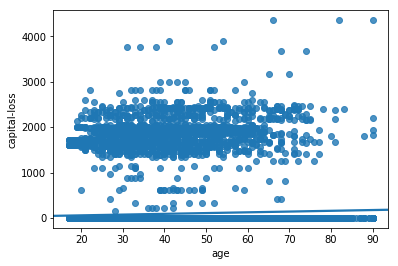

In [75]:
sns.regplot(data['age'],data['capital-loss'])

- Categorical Vs Categorical

In [59]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

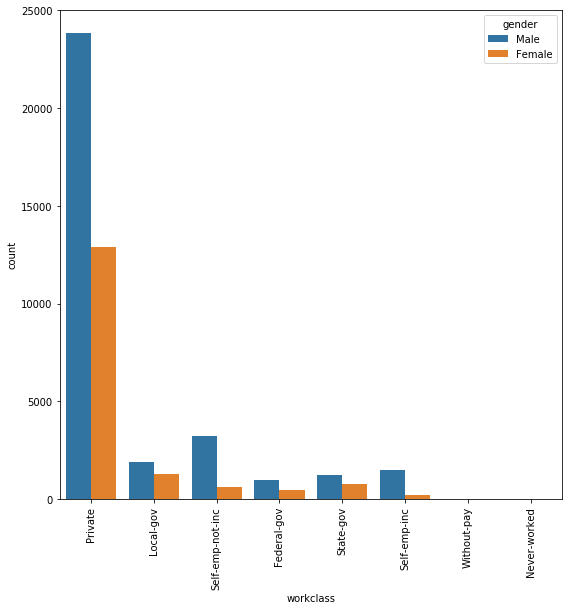

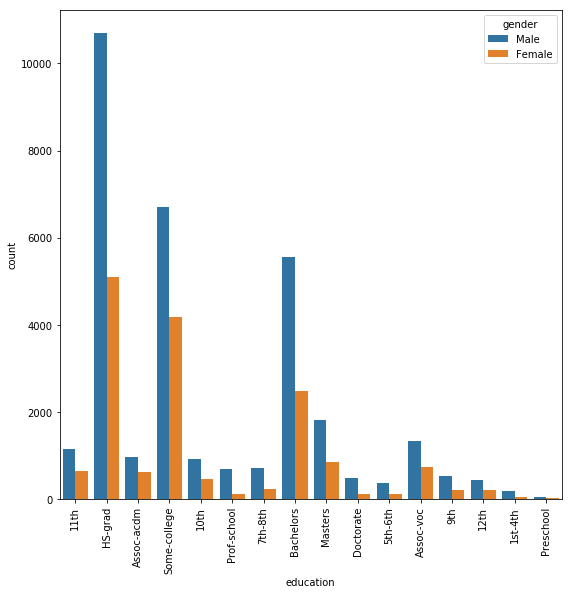

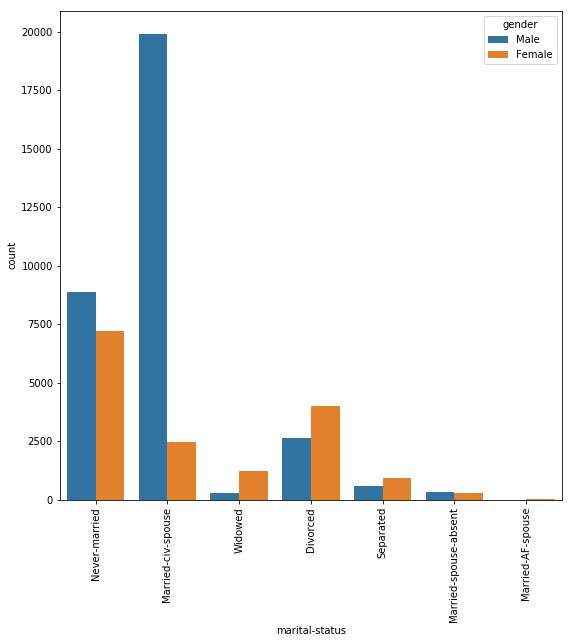

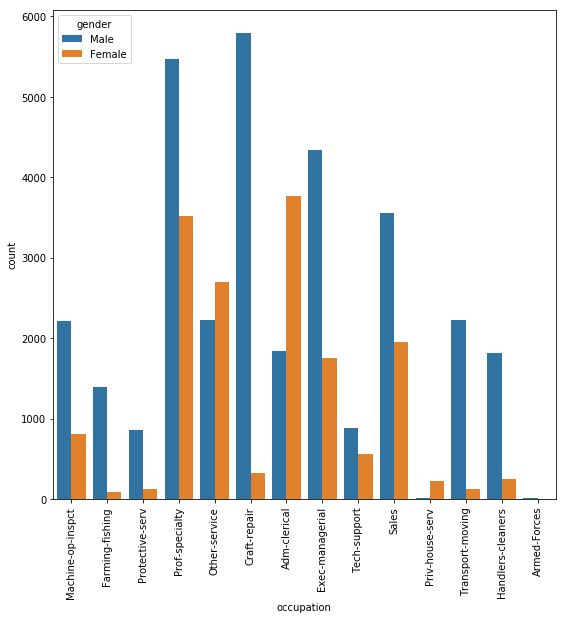

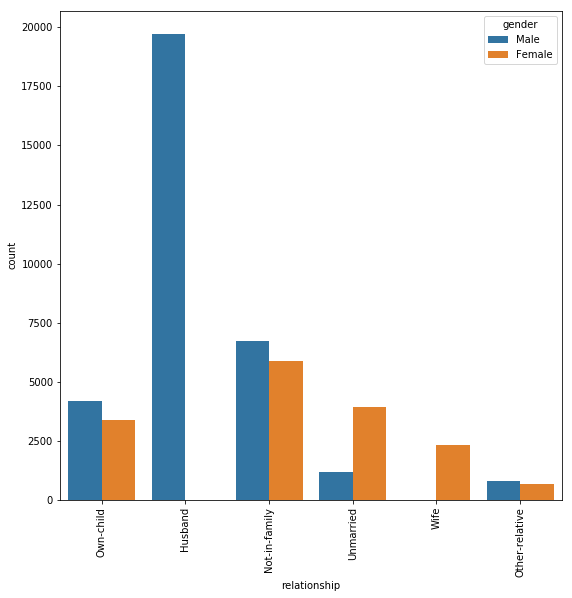

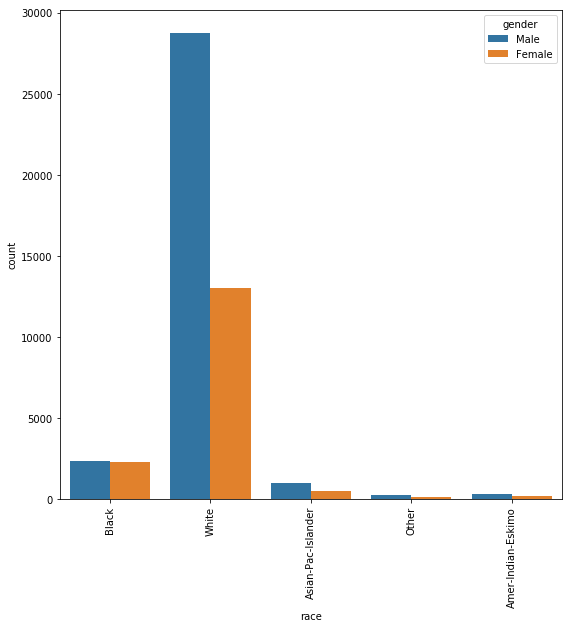

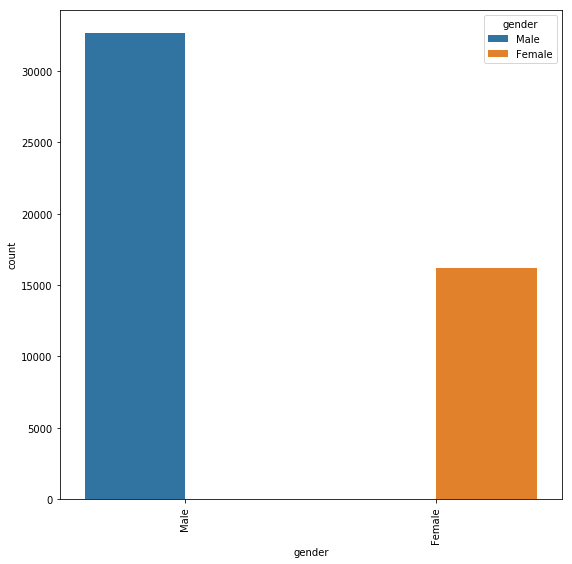

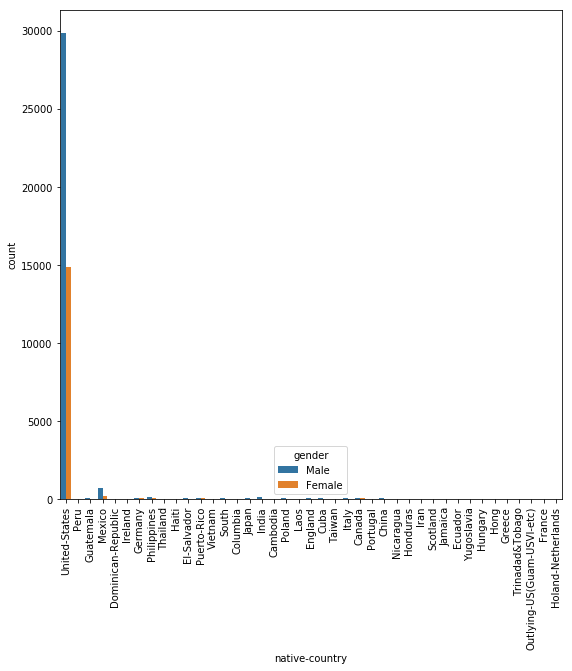

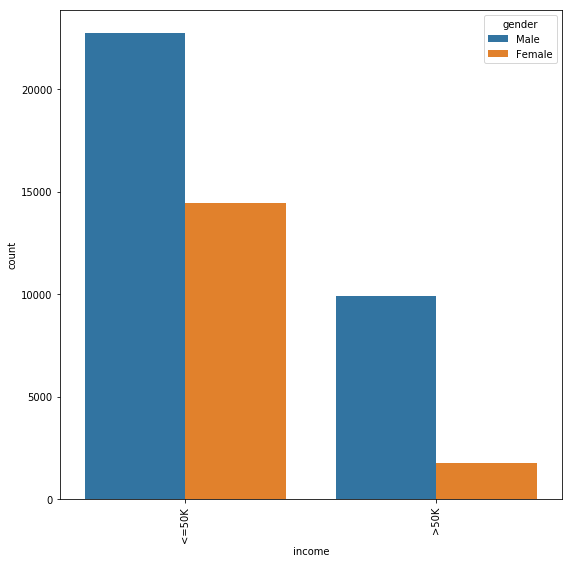

In [70]:
for i in cat:
    plt.figure(figsize=(9,9))
    sns.countplot(data[i],hue=data['gender'])
    plt.xticks(rotation=90)

### Multivariate plots

In [79]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [76]:
num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

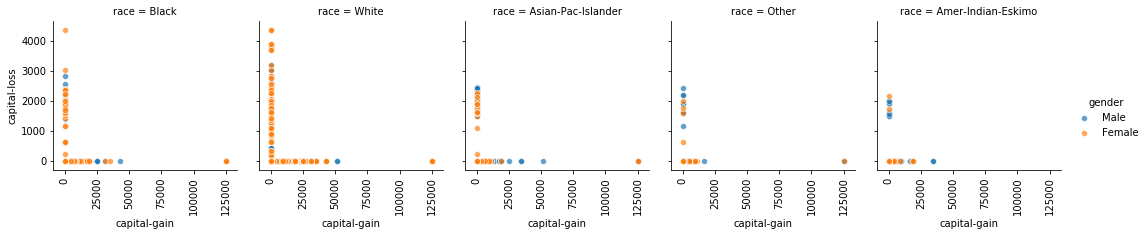

In [116]:
g = sns.FacetGrid(data, col="race", hue="gender")
g.map(sns.scatterplot, "capital-gain", "capital-loss", alpha=.7)
g.set_xticklabels(rotation=90)
g.add_legend()

### Factor Plot

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Text xticklabel objects>)

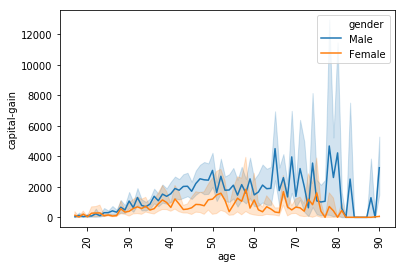

In [127]:
sns.lineplot(x='age',y='capital-gain',hue='gender',data=data)
plt.xticks(rotation=90)

### KDE plot

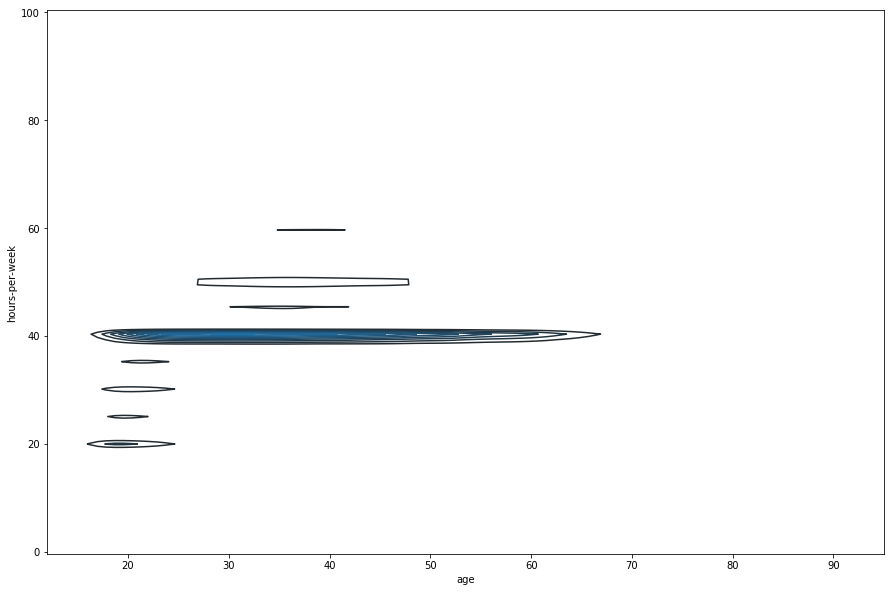

In [132]:
plt.figure(figsize=(15,10))
sns.kdeplot(data['age'],data['hours-per-week'])

### Pair plot

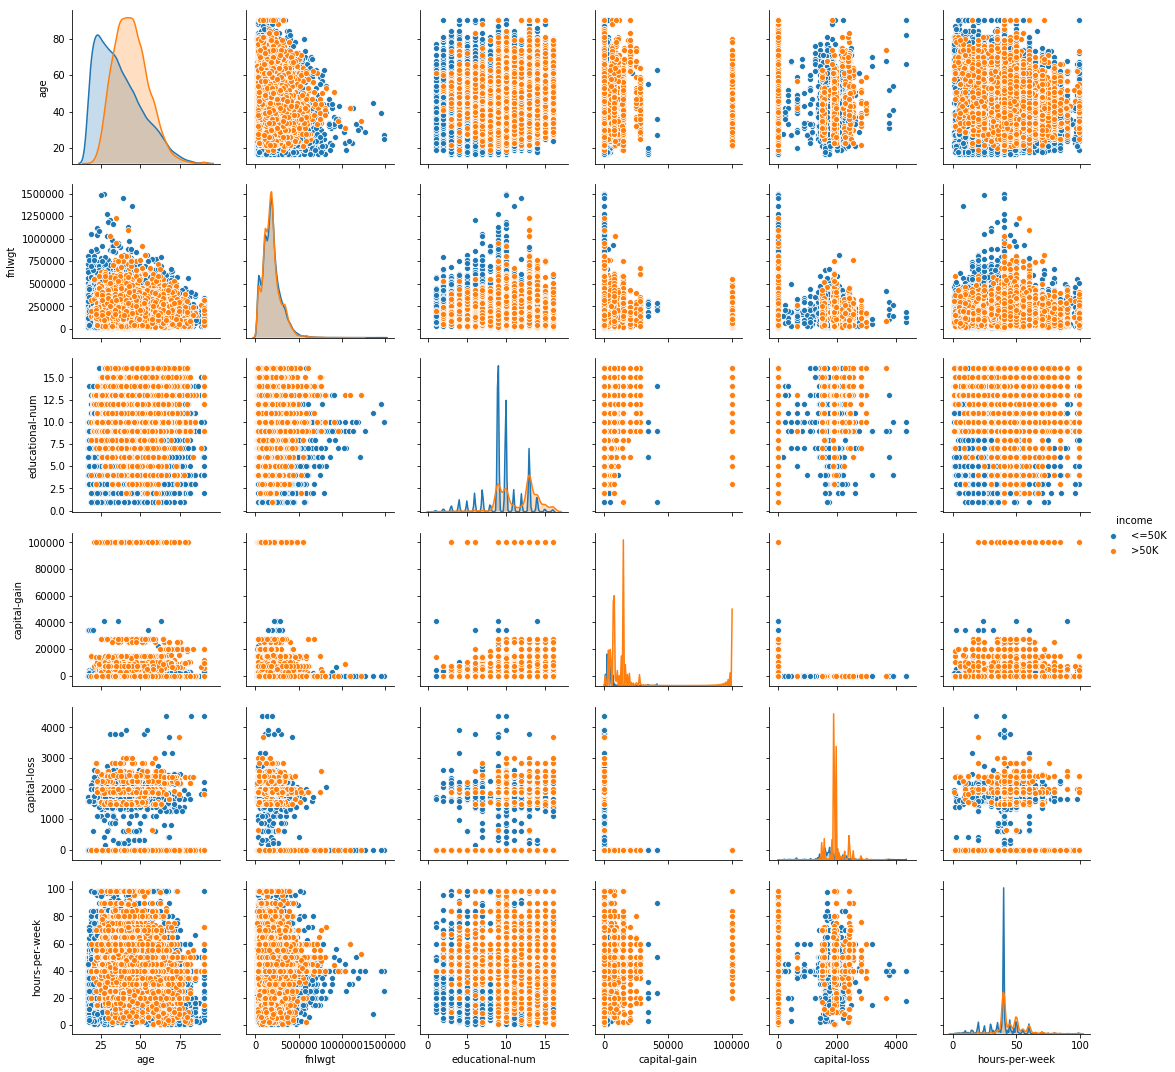

In [64]:
sns.pairplot(data,hue='income',kind='scatter')

# Outliers

In [134]:
data.quantile([0.1,0.95])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0.10,22.0,65738.20,7.0,0.0,0.0,24.0
0.95,63.0,379481.65,14.0,5013.0,0.0,60.0


In [135]:
q1,q3=np.percentile(data['age'],[25,75])

In [136]:
print(q1,q3)

28.0 48.0


In [137]:
iqr=q3-q1
iqr

20.0

In [138]:
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [139]:
lower_bound

-2.0

In [140]:
upper_bound

78.0

In [141]:
upper_boundary=data["age"].mean()+3*data["age"].std()
lower_boundary=data["age"].mean()-3*data["age"].std()

In [142]:
upper_boundary

79.77511524209137

In [143]:
lower_boundary

-2.4879443645679373

In [144]:
min_thresold=data['age'].quantile(0.05)
max_thresold=data['age'].quantile(0.95)

In [145]:
print(min_thresold,max_thresold)

19.0 63.0


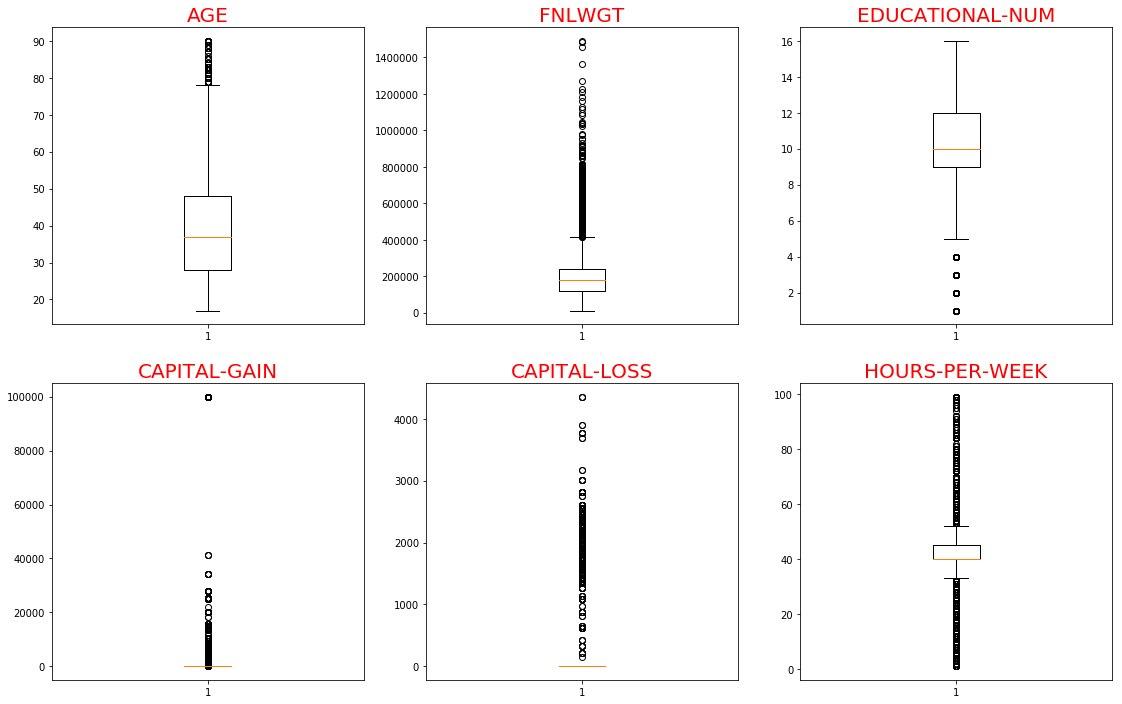

In [146]:
plt.figure(figsize=(19,12))
for i in range(len(num)):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[num[i]])
    plt.title(num[i].upper(),color="r",fontsize=20)

In [147]:
for i in num:
    q1,q3=np.percentile(data[i],[25,75])
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(i,lower_bound,upper_bound)

age -2.0 78.0
fnlwgt 117520.5 237672.0
educational-num -21.0 42.0
capital-gain -30.0 30.0
capital-loss -30.0 30.0
hours-per-week 10.0 75.0


In [148]:
def out(i):
    q1,q3=np.percentile(data[i],[25,75])
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(i,lower_bound,upper_bound)

In [149]:
out('age')

age -2.0 78.0


In [150]:
num

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

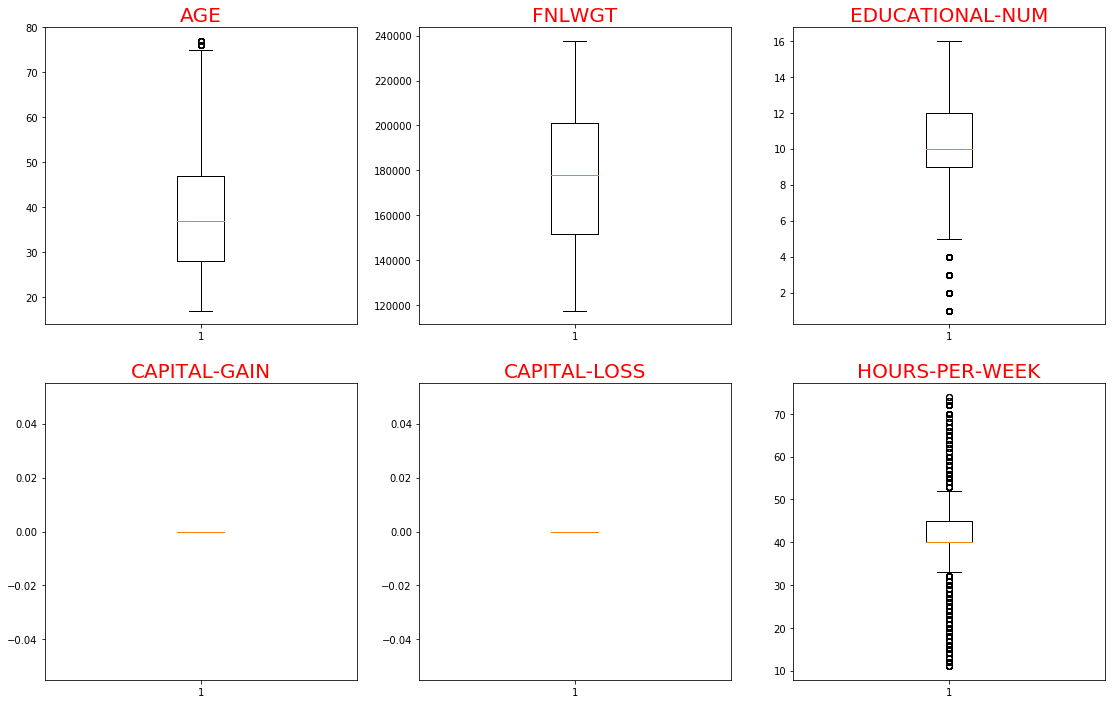

In [151]:
plt.figure(figsize=(19,12))
for i in range(len(num)):
    plt.subplot(2,3,i+1)
    q1,q3=np.percentile(data[num[i]],[25,75])
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    plt.boxplot(data[(data[num[i]]>lower_bound) & (data[num[i]]<upper_bound)][num[i]])
    plt.title(num[i].upper(),color="r",fontsize=20)